# Preprocessing Notebook

In [2]:
#Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#NLTK or Natural Language Toolkit imports (based on imports from lesson 5.03)
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

pd.set_option('display.max_colwidth' ,999)

In [3]:
#CSVs with lems after tokenizing and lemmatizing
preg_df = pd.read_csv('./data//Lem_data/pregnant_lems.csv').drop(columns= 'Unnamed: 0')
parent_df = pd.read_csv('./data//Lem_data/parent_lems.csv').drop(columns= 'Unnamed: 0')

In [4]:
preg_df.head(1)

,lems,selftext,title,title_lems,author,subreddit
0,anyone who could deliver any day now crossing finger that baby doesn t come tonight tomorrow so they don t share their birthday with halloween just me stay in there baby,"Anyone who could deliver any day now crossing fingers that baby doesn’t come tonight/tomorrow so they don’t share their birthday with Halloween? Just me? Stay in there, baby.",Halloween baby?,halloween baby,Beautiful_Bonus_4058,pregnant


### Creating new columns 'all_lems' and 'word_count'

In [7]:
#creating all lem column
preg_df['all_lems'] = preg_df['title_lems'] + ' ' + preg_df['lems']
parent_df['all_lems'] = parent_df['title_lems'] + ' ' + parent_df['lems']

In [8]:
#creating word count column
preg_df['word_count'] = preg_df['all_lems'].str.split().str.len()

parent_df['word_count'] = parent_df['all_lems'].str.split().str.len()

### Box Plots and Summary Statistics to check the word count distribution and outliers

In [9]:
preg_df[['word_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
word_count,94641.0,152.900572,164.618241,2.0,65.0,108.0,181.0,6135.0


''

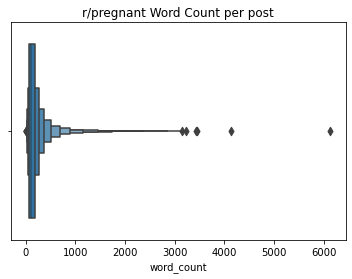

In [10]:
sns.boxenplot(x=preg_df['word_count'])

plt.title('r/pregnant Word Count per post')

plt.savefig('pregnant_boxenplot.png')
;

In [11]:
parent_df[['word_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
word_count,79162.0,224.849233,200.176196,2.0,101.0,170.0,282.0,5605.0


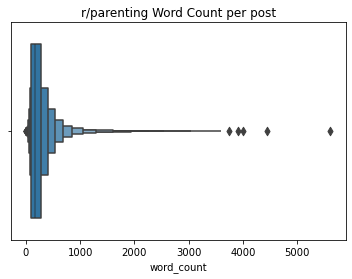

In [12]:
sns.boxenplot(x=parent_df['word_count'])

plt.title('r/parenting Word Count per post')

plt.savefig('parent_boxenplot.png');

Based on both of the box plots it looks as though there is a similar distribution of word counts for the posts from r/pregnant and r/parenting.

### Attempt to downsize DF's based on large and small outliers

In [9]:
# ~ 5000 that have 400 or more words
preg_df[preg_df['word_count'] >= 400].shape

(5073, 8)

In [10]:
# ~ 9000 that have 40 words or less
preg_df[preg_df['word_count'] <= 40].shape

(9512, 8)

In [20]:
preg_df = preg_df[(preg_df['word_count'] > 40) & (preg_df['word_count'] <400)]

In [21]:
preg_df.shape

(80056, 8)

In [13]:
# now down to 80 thousand posts
preg_df.shape

(80056, 8)

In [15]:
#672 with 1000 or more words
parent_df[parent_df['word_count'] >= 400].shape

(9949, 8)

In [16]:
parent_df[parent_df['word_count'] <= 50].shape

(4003, 8)

In [19]:
parent_df = parent_df[(parent_df['word_count'] > 50) & (parent_df['word_count'] < 400)]
parent_df.shape

(65210, 8)

#### Data Check

In [22]:
#number of posts with links
len([i for i in preg_df['selftext'] if 'https' in i])

1411

In [24]:
#function to find https posts with assistance from Matthew Ludwig
preg_df[preg_df['selftext'].map(lambda x: True if "https" in x else False)].index

Int64Index([  101,   202,   212,   369,   388,   406,   451,   550,   686,
              736,
            ...
            93698, 93796, 93805, 93884, 93945, 94033, 94034, 94052, 94145,
            94295],
           dtype='int64', length=1411)

In [25]:
#dropping said rows
preg_df.drop(preg_df[preg_df['selftext'].map(lambda x: True if "https" in x else False)].index, inplace= True)

In [26]:
preg_df.shape

(78645, 8)

In [27]:
#same for r/parenting
parent_df[parent_df['selftext'].map(lambda x: True if "https" in x else False)].index

Int64Index([   34,    37,   182,   313,   373,   406,   471,   503,   568,
              589,
            ...
            78961, 78964, 78993, 79009, 79011, 79015, 79041, 79071, 79085,
            79113],
           dtype='int64', length=1926)

In [28]:
#same for r/parenting
parent_df.drop(parent_df[parent_df['selftext'].map(lambda x: True if "https" in x else False)].index, inplace=True)

In [29]:
parent_df.shape

(63284, 8)

In [30]:
parent_df.columns

Index(['lems', 'selftext', 'title', 'title_lems', 'author', 'subreddit',
       'all_lems', 'word_count'],
      dtype='object')

#### Downsampling to make data more managable
We still have some very large dataframes at 78,645 ros for r/pregnant, & 63,284 rows for r/parenting. 

To further downsample the data and make modeling more manageable I will be randomly sampling out 25,000 posts from each subreddit for an overall total of 50,000 posts.

In [31]:
preg_downsample   = preg_df.sample(n= 25_000, random_state= 37)
parent_downsample = parent_df.sample(n = 25_000, random_state= 37)

In [33]:
preg_downsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 58976 to 88413
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lems        25000 non-null  object 
 1   selftext    25000 non-null  object 
 2   title       25000 non-null  object 
 3   title_lems  25000 non-null  object 
 4   author      25000 non-null  object 
 5   subreddit   25000 non-null  object 
 6   all_lems    25000 non-null  object 
 7   word_count  25000 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.7+ MB


In [34]:
parent_downsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 56101 to 44721
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lems        25000 non-null  object 
 1   selftext    25000 non-null  object 
 2   title       25000 non-null  object 
 3   title_lems  25000 non-null  object 
 4   author      25000 non-null  object 
 5   subreddit   25000 non-null  object 
 6   all_lems    25000 non-null  object 
 7   word_count  25000 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.7+ MB


In [35]:
#exporting downsampled datasets to csv
preg_downsample.to_csv('./data/preg_downsample.csv')

In [36]:
parent_downsample.to_csv('./data/parent_downsample.csv')